<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/RecursiveFeatureEliminationWithCross-Validatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Recursive feature elimination with cross-validation
A Recursive Feature Elimination (RFE) example with automatic tuning of the number of features selected with cross-validation.

#Data generation
We build a classification task using 3 informative features. The introduction of 2 additional redundant (i.e. correlated) features has the effect that the selected features vary depending on the cross-validation fold. The remaining features are non-informative as they are drawn at random.

In [2]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler



In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)

##Model training and selection
We create the RFE object and compute the cross-validated scores. The scoring strategy “accuracy” optimizes the proportion of correctly classified samples.

In [4]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 3


In the present case, the model with 3 features (which corresponds to the true generative model) is found to be the most optimal.

##Plot number of features VS. cross-validation scores

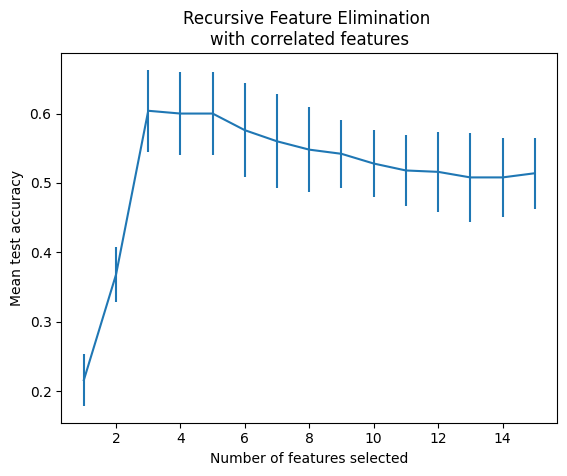

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

From the plot above one can further notice a plateau of equivalent scores (similar mean value and overlapping errorbars) for 3 to 5 selected features. This is the result of introducing correlated features. Indeed, the optimal model selected by the RFE can lie within this range, depending on the cross-validation technique. The test accuracy decreases above 5 selected features, this is, keeping non-informative features leads to over-fitting and is therefore detrimental for the statistical performance of the models.